C:\Users\1\AppData\Local\Temp/ipykernel_6136/3522709960.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gs" (-> color='g'). The keyword argument will take precedence.
  pl.errorbar(x, data, err, fmt='gs', capsize=22, color = 'black')


(2.5, 8.0)

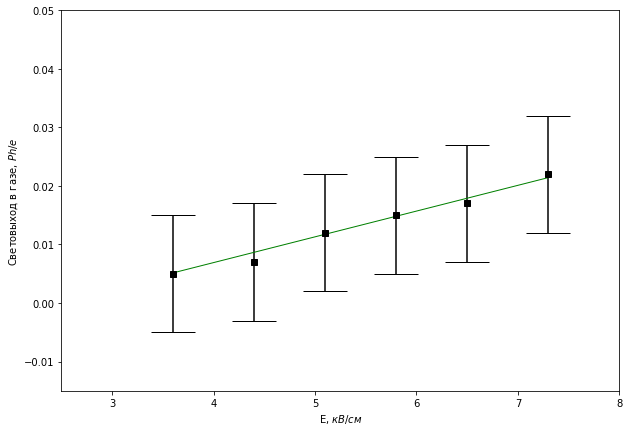

In [70]:
x = [3.6, 4.4, 5.1, 5.8, 6.5, 7.3]
data = [0.005, 0.007, 0.012, 0.015, 0.017, 0.022]
y = [0.0044*i - 0.0107 for i in x]
err=1/(9999**0.5)

import matplotlib.pyplot as pl
pl.figure(num=10, figsize=(10, 7))
#plot(x, [0.0044*i - 0.0107 for i in x], linewidth=1, color ='r')
pl.errorbar(x, data, err, fmt='gs', capsize=22, color = 'black')
pl.plot(x, y, linewidth=1, color ='green')
pl.xlabel(r'E, $кВ/см$')
pl.ylabel(r'Световыход в газе, $Ph/e$')
#pl.savefig('gr_v1.pdf', bbox_inches='tight', format='pdf')
pl.ylim((-0.015,0.050))
pl.xlim((2.5,8))

In [28]:
import math
import numpy as np

In [46]:
V = [10, 12, 14, 16, 18, 20]
E_g = [i*600/(804*(0.4/1.55+1.8)) for i in V] #поле в газе
print(E_g)
Td_g = [i/0.83 for i in E_g]                 #поле в газе(Тд)
E_l = [i*3*40/(4.8*804) for i in V]          #поле в жидкости
#print(E_l)

k_rec = 485+46665/25                           #(kV/cm)
K_att = [0.95/i**0.8 for i in E_l]
N_i = (8*10**6)*0.6/9                        #общее количество электронов
n = [N_i*0.61*math.exp(-K_att[i]*4.8*2*0.001)/(1+k_rec/E_l[i]) for i in range (0,6)]   #n_e
print(n)

N_n= [0.005, 0.007, 0.012, 0.015, 0.017, 0.022] #N(pe/e)

N_pe = [N_n[i]*n[i] for i in range (0,6)]    #N(pe)
print(N_pe)

[3.6260702755813408, 4.351284330697609, 5.076498385813877, 5.801712440930145, 6.526926496046413, 7.2521405511626815]
[42.02499490947539, 50.58782634551359, 59.155139547838104, 67.72570252907302, 76.29870337468735, 84.8735769166633]
[0.21012497454737694, 0.3541147844185951, 0.7098616745740572, 1.0158855379360952, 1.2970779573696851, 1.8672186921665923]


In [37]:
import numpy as np
#20kV
K = [(980 - 820)*50/2, (710-570)*25,(480-320)*25,(500-340)*25, 180*25, (980-830)*25, (950-810)*25, (400-260)*35, (380-240)*25, (950-810)*25]
K_mean = int(np.mean(K))
print(K_mean)  #коэффициент перевода

3915


In [38]:
Sav = [N_pe[i]*K_mean for i in range (0, 6)]
print(Sav)

[822.6392753529807, 1386.3593809988, 2779.108455957434, 3977.1918810198126, 5078.060203102317, 7310.161179832209]


C:\Users\1\AppData\Local\Temp/ipykernel_6136/1194105829.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gs" (-> color='g'). The keyword argument will take precedence.
  pl.errorbar(E_g, Sav, err, fmt='gs', capsize=22, color = 'black')


(2.0, 8.0)

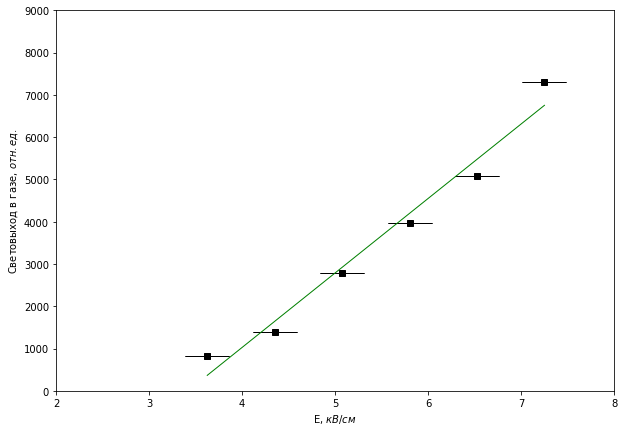

In [69]:
y = [1761.5*i - 6022 for i in E_g]
err=1/(9999**0.5)

import matplotlib.pyplot as pl
pl.figure(num=10, figsize=(10, 7))
pl.errorbar(E_g, Sav, err, fmt='gs', capsize=22, color = 'black')
pl.plot(E_g, y, linewidth=1, color ='green')
pl.xlabel(r'E, $кВ/см$')
pl.ylabel(r'Световыход в газе, $отн. ед.$')
pl.ylim((0,9000))
pl.xlim((2,8))

In [90]:
import matplotlib.pyplot as pl
from scipy import interpolate
from scipy import interp as itp  
#y_1 = [1761.5*i - 6022 for i in Td_g]
#f = interpolate.interp1d(Td_g, Sav, kind='zero', axis=- 1, copy=True, bounds_error=None)
#f =interpolate.splrep(Td_g, Sav, k=1, s=0)
#f=itp(Td_g, Sav)
pl.figure(num=10, figsize=(10, 7))
pl.errorbar(Td_g, Sav, err, fmt='gs', capsize=22, color = 'black')
pl.plot(Td_g, f(Td_g), linewidth=1, color ='green')
pl.xlabel(r'E, $Td$')
pl.ylabel(r'Световыход в газе, $отн. ед.$')
pl.ylim((0,9000))
pl.xlim((3,10))

C:\Users\1\AppData\Local\Temp/ipykernel_6136/3248643905.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  f=itp(Td_g, Sav)


TypeError: _interp_dispatcher() missing 1 required positional argument: 'fp'

In [81]:
import scipy.interpolate
print(scipy.interpolate.interp1d(Td_g, Sav, kind='linear', axis=- 1, copy=True, bounds_error=None))
pl.show(y_1)